<a href="https://colab.research.google.com/github/Aradhyakapil/PRODIGY_ML_01/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# If running in a Jupyter notebook, use this line to display plots inline
# %matplotlib inline

# Importing Data and Checking Out
HouseDF = pd.read_csv('/content/drive/MyDrive/Housing.csv')
print(HouseDF.head())

# Data Info
print(HouseDF.info())

# Data Description
print(HouseDF.describe())

# Columns
print(HouseDF.columns)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

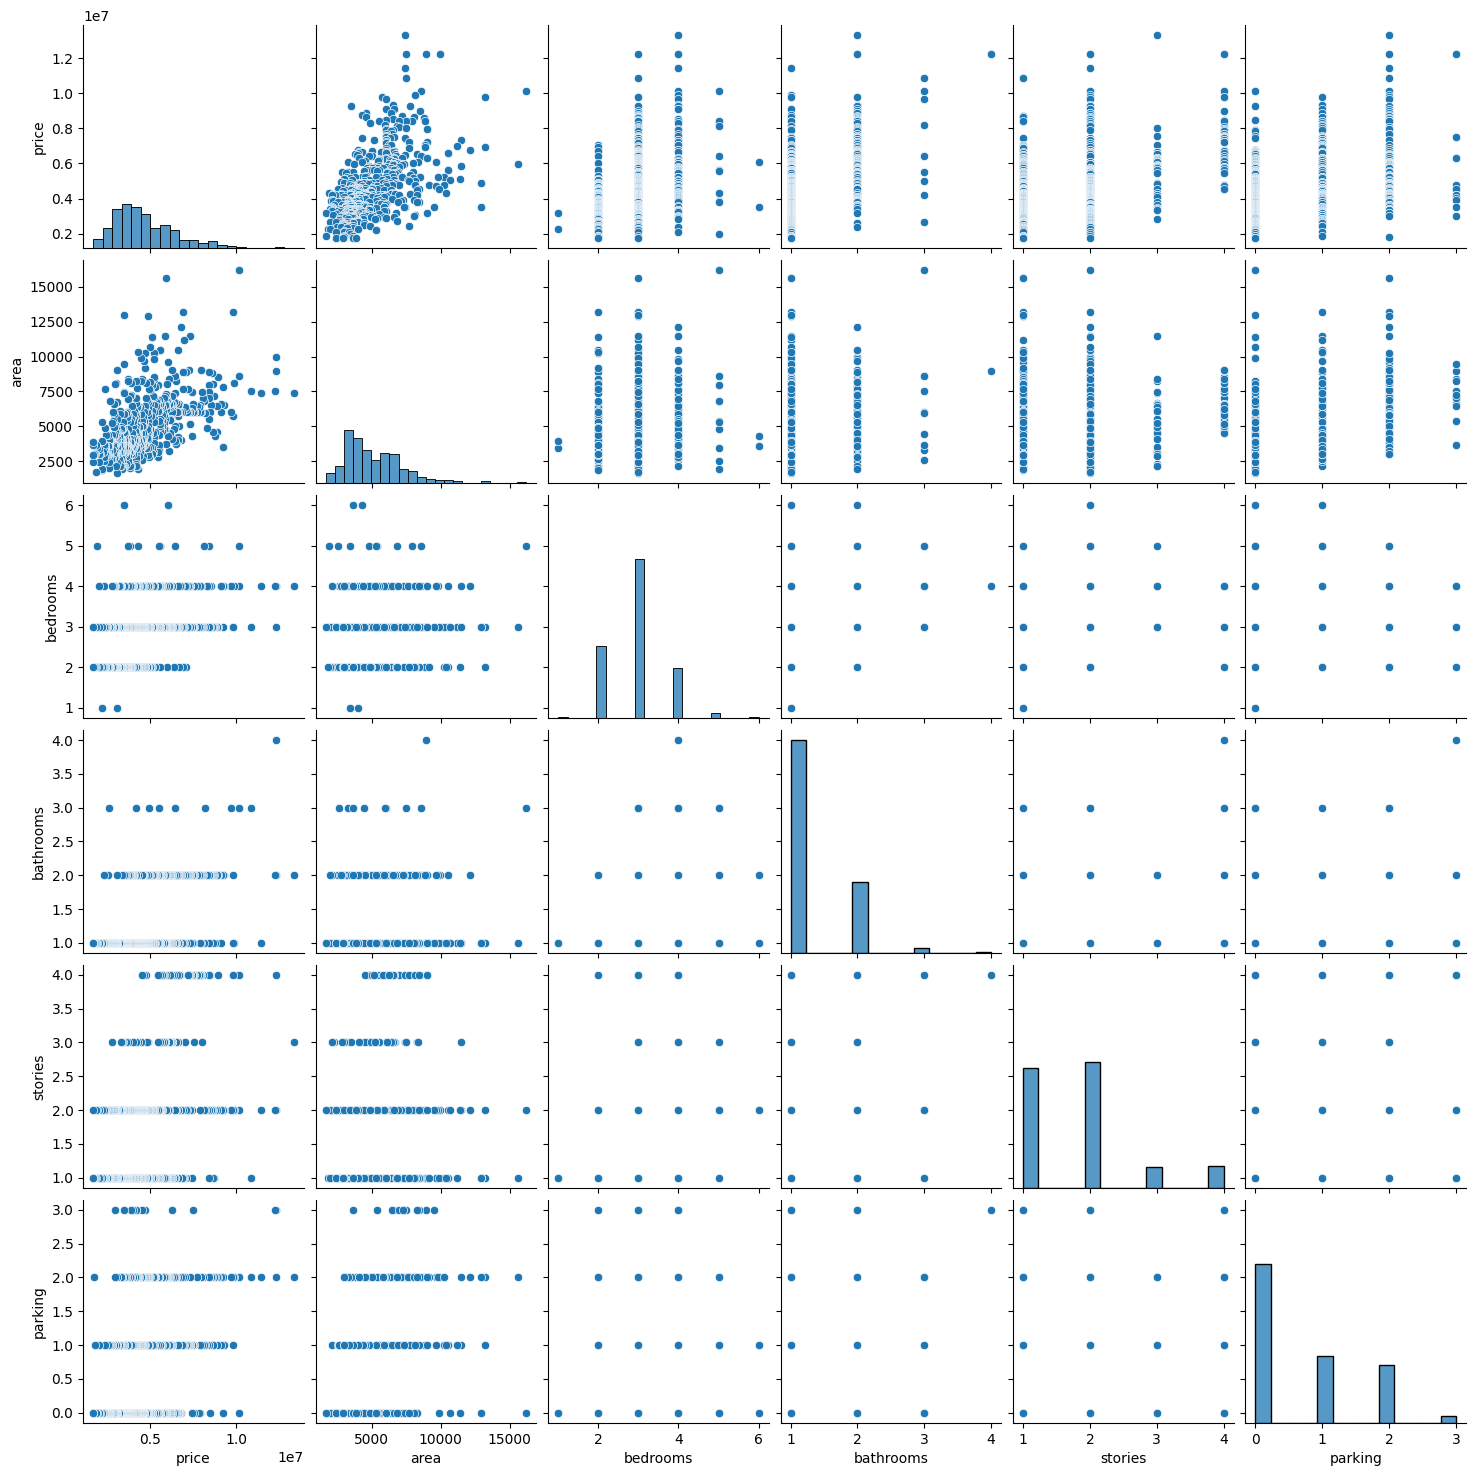

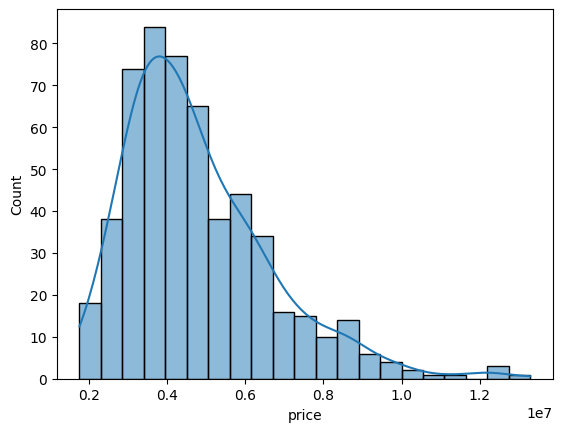

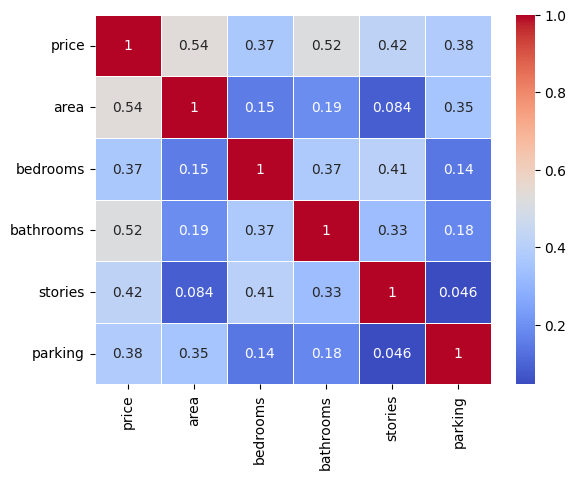

In [4]:
# Exploratory Data Analysis for House Price Prediction

# Pair plot
sns.pairplot(HouseDF)
plt.show()

# Distribution plot of house prices
sns.histplot(HouseDF['price'], kde=True)
plt.show()

# Filter numeric columns for correlation heatmap
numeric_features = HouseDF.select_dtypes(include=[np.number])
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Intercept: -344606.845634575
            Coefficient
area       4.017596e+02
bedrooms   3.457636e+05
bathrooms  1.521708e+06


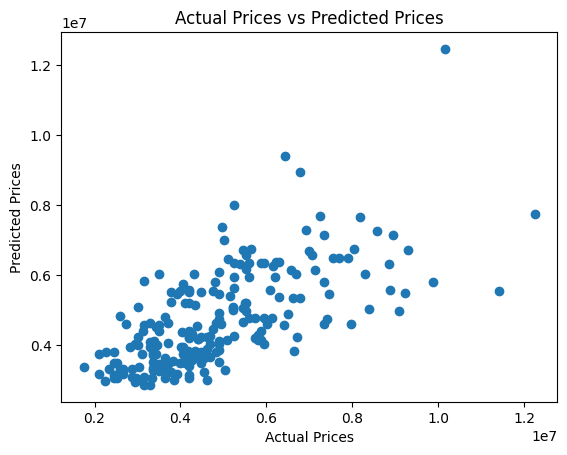

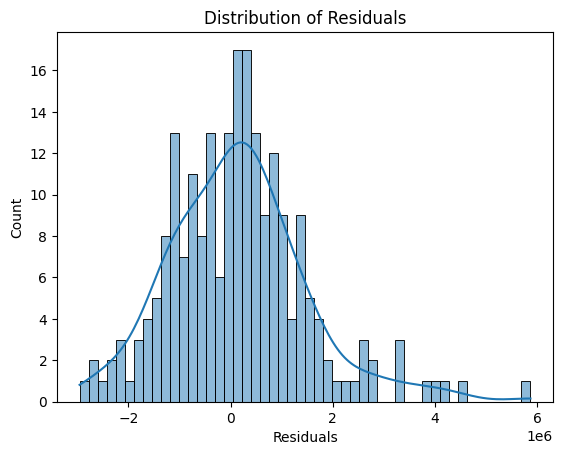

MAE: 1013616.75011551
MSE: 1853592032397.3142
RMSE: 1361466.8679028933


In [5]:
# Training a Linear Regression Model
# X and y List
X = HouseDF[['area', 'bedrooms', 'bathrooms']]
y = HouseDF['price']

# Split Data into Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Linear Regression Model Evaluation
print(f'Intercept: {lm.intercept_}')
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Predictions from the Linear Regression Model
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

# Histogram of residuals
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Regression Evaluation Metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')
